## Nome: Sérgio Ricardo Vieira Torres Silva

## Curso: Economia

## Matricula: 21211879

## **Manipulação de dados utilizado API SINDRA-IBGE**

https://apisidra.ibge.gov.br/

https://sidra.ibge.gov.br/home/pnadcm

### 📊 Economia (ECO)
 # 📋Titulo do projeto:
- Análise: Pessoas de 14 anos ou mais desocupadas, por tempo de procura de trabalho (tabela 1616 - IBGE/SIDRA)

- Em resumo, a análise refere-se à quantidade de pessoas com 14 anos ou mais que estão desocupadas, considerando o **tempo que essas pessoas esperam antes de iniciar a procura por emprego.**

---

### 🎯 Objetivos
- Aplicar os conhecimentos adquiridos ao longo do curso
- Trabalhar com dados reais ou simulados
- Apresentar os resultados com visualizações
- Desenvolver habilidades de comunicação e análise
----

## 📋 Estrutura Esperada do Projeto
| Seção               | Conteúdo Esperado                                                        |
|---------------------|---------------------------------------------------------------------------|
|a) Introdução          | Apresentação do problema ou contexto                                      |
|b) Conjunto de Dados   | Fonte, estrutura e breve descrição                                        |
|c) Manipulação da base de dados | com o uso da biblioteca `pandas`      |
|d) Análises Aplicadas  | Uso de `pandas` para agrupar, filtrar, calcular médias, totais etc.       |
|e) Visualizações       | Uso de gráficos com `matplotlib` ou `pandas` para mostrar padrões         |
|f) Conclusão           | Interpretação dos resultados com base nas evidências                     |


In [36]:
!pip install -U sidrapy



---
# Pessoas de 14 anos ou mais desocupadas, por tempo de procura de trabalho


(tabela 1616 - IBGE/SIDRA)

---

a)  Introdução: Apresentação do problema ou contexto.

O objetivo deste projeto é analisar o tempo de procura de trabalho, tendo como amostra as pessoas de 14 anos ou mais que estão desocupadas. Sendo assim, foi ultilizado a base de dados IBGE/SIDRA.

Informações da tabela utilizada:
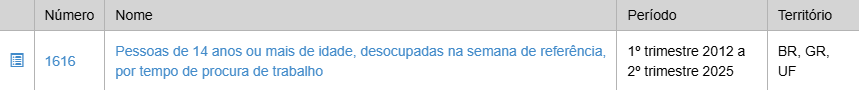




## ````I - Importação das bibliotecas````

In [ ]:
#carregando as bibliotecas nescessárias
import sidrapy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### ````a) Introdução: Apresentação do problema ou contexto.````

O objetivo deste projeto é analisar o tempo de procura de trabalho, tendo como amostra as pessoas de 14 anos ou mais que estão desocupadas. Sendo assim, foi ultilizado a base de dados IBGE/SIDRA.

Informações da tabela utilizada:
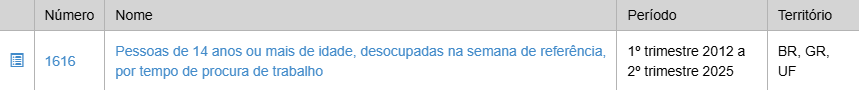

---


## ````II - Extração da base de dados.````

- para a extração dos dados foi utilizado o código 1616 digitado nesse campo: 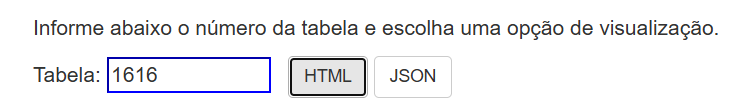

Escolhendo a opção "HTML", portanto, irão aparecer todas as informações utilizadas para a construção de uma API pronta do IBGE disponível no site https://apisidra.ibge.gov.br/. além disso, utilizando a documentação da biblioteca **sindray**, disponibilizada no site https://sidrapy.readthedocs.io/pt-br/latest/, foi possível definir os parâmetros necessários para a escolha da análise escolhida por mim, tendo como nome ***Pessoas de 14 anos ou mais desocupadas, por tempo de procura de trabalho***, de acordo com a tabela mecionada na introdução.

----

#### ````b) Fonte, estrutura e breve descrição````

In [37]:
# extração da tabela
base = sidrapy.get_table(
    table_code="1616",
    territorial_level="3",   # 1 = Brasil, 3 = UF, 2 = Municípios
    ibge_territorial_code="all", #/N3/  # todos os estados
    variable="4092", #/V/  # Pessoas desocupadas
    period ="all", #/P/
    classifications={"1965": "all"} # todas as categorias de tempo
)

# ````III - Manipulação da base de dados````
----

#### ````c) Manipulação da base de dados com o uso da biblioteca `pandas` ````

link da documentação: https://pandas.pydata.org/docs/

In [43]:
print("Visualização da base de dados bruta:")

df = pd.DataFrame(base)
df.head()

Visualização da base de dados bruta:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Trimestre (Código),Trimestre,Variável (Código),Variável,Tempo de procura de trabalho (Código),Tempo de procura de trabalho
1,3,Unidade da Federação,1572,Mil pessoas,61,11,Rondônia,201201,1º trimestre 2012,4092,"Pessoas de 14 anos ou mais de idade, desocupad...",40310,Total
2,3,Unidade da Federação,1572,Mil pessoas,9,11,Rondônia,201201,1º trimestre 2012,4092,"Pessoas de 14 anos ou mais de idade, desocupad...",31827,Menos de 1 mês
3,3,Unidade da Federação,1572,Mil pessoas,35,11,Rondônia,201201,1º trimestre 2012,4092,"Pessoas de 14 anos ou mais de idade, desocupad...",31828,De 1 mês a menos de 1 ano
4,3,Unidade da Federação,1572,Mil pessoas,6,11,Rondônia,201201,1º trimestre 2012,4092,"Pessoas de 14 anos ou mais de idade, desocupad...",31829,De 1 ano a menos de 2 anos


- selecionando apenas as colunas que serão necessárias para minha análise



In [44]:
df = df[["D1N", "D4N", "V", "MN", "D2C", "D2N"]].copy()


- Definindo o cabeçalho como titulo da coluna

In [45]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Unidade da Federação,Tempo de procura de trabalho,Valor,Unidade de Medida,Trimestre (Código),Trimestre
1,Rondônia,Total,61,Mil pessoas,201201,1º trimestre 2012
2,Rondônia,Menos de 1 mês,9,Mil pessoas,201201,1º trimestre 2012
3,Rondônia,De 1 mês a menos de 1 ano,35,Mil pessoas,201201,1º trimestre 2012
4,Rondônia,De 1 ano a menos de 2 anos,6,Mil pessoas,201201,1º trimestre 2012
5,Rondônia,2 anos ou mais,11,Mil pessoas,201201,1º trimestre 2012


- Verificando

In [46]:
df.dtypes

,0
0,
Unidade da Federação,object
Tempo de procura de trabalho,object
Valor,object
Unidade de Medida,object
Trimestre (Código),object
Trimestre,object


- Transformando a coluna Valor, que está em string (str), para inteiro (int) e, após isso, criando uma nova coluna com o valor absoluto.


In [47]:
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce").fillna(0).astype(int)
df["Valor"] = df["Valor"] * 1000


- Criando a coluna **Ano**, a partir da coluna **Trimestre (Código)**

In [48]:
df.loc[:, 'Ano'] = df['Trimestre (Código)'].str[:4]


- dropando a coluna **Trimestre (Código)**

In [49]:
df = df.drop(columns=['Trimestre (Código)'])



- Renomeando algumas colunas que acho válido renomear

In [50]:
df = df.rename(columns={"Unidade da Federação":"Estado",
                        "Valor":"Quantidade de pessoas desocupadas"})


- Reordenando a posição das colunas e visualizando os dados filtrados os limpos

In [51]:
df = df[["Ano", "Trimestre","Estado","Tempo de procura de trabalho","Quantidade de pessoas desocupadas"]]
print("Visualização dos dados com o qual tenho intersse em análsar:")
df.head()

Visualização dos dados com o qual tenho intersse em análsar:


,Ano,Trimestre,Estado,Tempo de procura de trabalho,Quantidade de pessoas desocupadas
1,2012,1º trimestre 2012,Rondônia,Total,61000
2,2012,1º trimestre 2012,Rondônia,Menos de 1 mês,9000
3,2012,1º trimestre 2012,Rondônia,De 1 mês a menos de 1 ano,35000
4,2012,1º trimestre 2012,Rondônia,De 1 ano a menos de 2 anos,6000
5,2012,1º trimestre 2012,Rondônia,2 anos ou mais,11000


# ````IV - Análises e visualizações````


#### ````d) Análises aplicadas com o pandas  para agrupar, calcular médias, totais etc.````

- agrupando as colunas e utilizando o **SUM** para somar

In [65]:
agrupado = df.groupby(["Tempo de procura de trabalho"])["Quantidade de pessoas desocupadas"].sum()


- Formatando os números da coluna **Quantidade de pessoas desocupadas**

In [66]:
agrupando_format = agrupado.apply(lambda x: f"{x:,.0f}".replace(",", "."))
print("\nTotal de desocupandos por tempo de procura de trabalho:")
agrupando_format.head()


Total de desocupandos por tempo de procura de trabalho:


,Quantidade de pessoas desocupadas
Tempo de procura de trabalho,
2 anos ou mais,94.544.000
De 1 ano a menos de 2 anos,64.314.000
De 1 mês a menos de 1 ano,215.248.000
Menos de 1 mês,63.324.000
Total,437.399.000


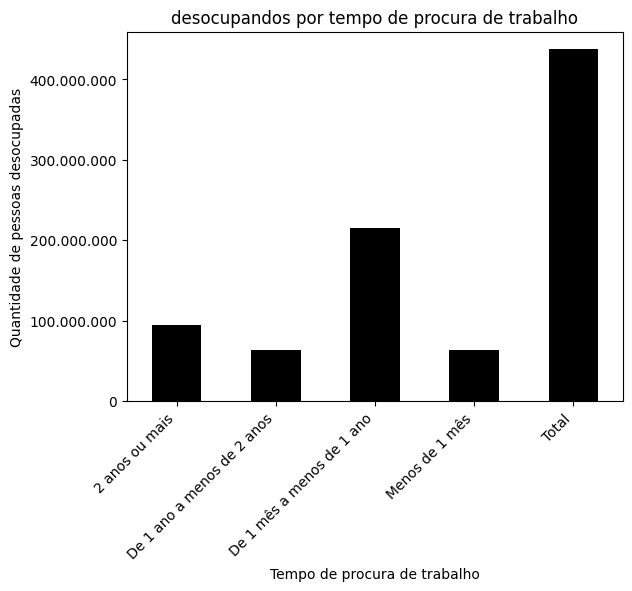

In [67]:
import matplotlib.ticker as mtick
agrupado.plot(kind="bar", title = "desocupandos por tempo de procura de trabalho", color = "black")
plt.gca().yaxis.set_major_formatter(
mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.xlabel("Tempo de procura de trabalho")
plt.ylabel("Quantidade de pessoas desocupadas")
plt.xticks(rotation=45, ha="right")

plt.show()

- agrupando **Ano** e **Quantidade de pessoas desocupadas** para saber a quantidade exata em cada ano

In [78]:
agrupado = df.groupby(["Ano"])["Quantidade de pessoas desocupadas"].sum()
agrupando_format = agrupado.apply(lambda x: f"{x:,.0f}".replace(",", "."))
agrupando_format.head(25)

,Quantidade de pessoas desocupadas
Ano,
2012,57.031.000
2013,56.210.000
2014,54.242.000
2015,69.082.000
2016,94.127.000
2017,105.455.000
2018,102.665.000
2019,101.027.000
2020,25.852.000


- agrupando **Ano** e **Quantidade de pessoas desocupadas** para saber a evolução

In [79]:
agrupado1 = df.groupby(["Ano"])["Quantidade de pessoas desocupadas"].sum()

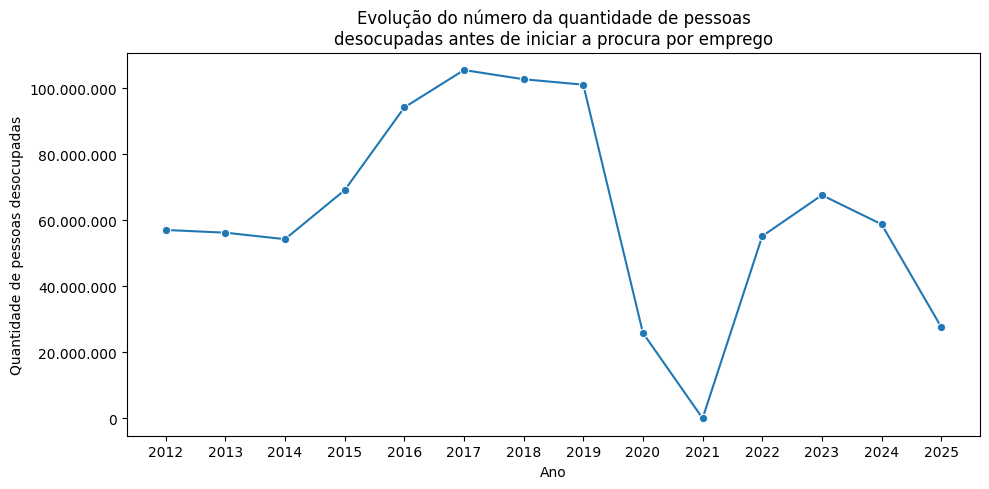

In [82]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
sns.lineplot(x=agrupado1.index, y=agrupado1.values, marker="o")

plt.gca().yaxis.set_major_formatter(
mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "."))

)

plt.ylabel("Quantidade de pessoas desocupadas")
plt.xlabel("Ano")
plt.title("Evolução do número da quantidade de pessoas\ndesocupadas antes de iniciar a procura por emprego")


plt.tight_layout()
plt.show()

# ````V - Interpretação dos resultados com base nas evidências````

- Conclusões

O gráfico mostra a evolução do número de pessoas desocupadas ao longo dos anos, de 2012 a 2025. Houve uma queda acentuada em 2020 e 2021, com o número de desocupados caindo na época da pandemia (COVID-19). Sendo assim, houve uma nova pesquisa da PENAD, que foi feita por telefone. Por isso, a quantidade de pessoas em busca de emprego em 2021 é zero. Por outro lado, observa-se uma tendência de aumento no número de desocupados entre 2014 e 2017, atingindo o pico em 2017.
A partir de 2021, o gráfico indica uma recuperação, com um aumento no número de desocupados em 2022 e 2023. Para 2024 e 2025, infere-se, portanto, pelas análises feitas, que as projeções indicam uma nova queda no número de desocupados em busca de emprego.
